In [3]:
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image, ImageDraw, ImageFont
from dataclasses import dataclass

# Annotation format
Number of points (default is 9)
Left Eye
Right Eye
Mouth
Left Ear-1
Left Ear-2
Left Ear-3
Right Ear-1
Right Ear-2
Right Ear-3

In [4]:
@dataclass
class Annotation:
    points: int
    left_eye_x: int
    left_eye_y: int
    right_eye_x: int
    right_eye_y: int
    mouth_x: int
    mouth_y: int
    left_ear_1_x: int
    left_ear_1_y: int
    left_ear_2_x: int
    left_ear_2_y: int
    left_ear_3_x: int
    left_ear_3_y: int
    right_ear_1_x: int
    right_ear_1_y: int
    right_ear_2_x: int
    right_ear_2_y: int
    right_ear_3_x: int
    right_ear_3_y: int    

In [5]:
def list_cat_files(path):
    pattern = os.path.join(path, "**","*.jpg")
    cat_jpg_paths = glob.glob(pattern, recursive=True)
    jpg_and_annotation = [(jpg, f"{jpg}.cat") for jpg in cat_jpg_paths]
    return jpg_and_annotation

In [6]:
def load_cat_and_annotation(jpg, annotation):
    image = Image.open(jpg)
    annotation_data = [int(x) for x in open(annotation).read().strip().split(" ")]
    annotation = Annotation(*annotation_data)
    return image, annotation

In [26]:
def get_face(image, annotation):
    x = [
        annotation.left_eye_x, 
        annotation.right_eye_x, 
        annotation.mouth_x, 
        annotation.left_ear_1_x, 
        annotation.left_ear_2_x,
        annotation.left_ear_3_x,
        annotation.right_ear_1_x, 
        annotation.right_ear_2_x,
        annotation.right_ear_3_x
    ]
    y = [
        annotation.left_eye_y, 
        annotation.right_eye_y, 
        annotation.mouth_y, 
        annotation.left_ear_1_y, 
        annotation.left_ear_2_y,
        annotation.left_ear_3_y,
        annotation.right_ear_1_y, 
        annotation.right_ear_2_y,
        annotation.right_ear_3_y
    ]
    bb = [(min(x), min(y)), (max(x), max(y))]
    return bb

In [27]:
def visualize_cat_and_annotation(image, annotation):
    #fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 40)
    draw = ImageDraw.Draw(image)
    draw.text((annotation.left_eye_x, annotation.left_eye_y), "left eye", fill=(255,0,0,255))
    draw.text((annotation.right_eye_x, annotation.right_eye_y), "right eye", fill=(255,0,0,255))
    draw.text((annotation.mouth_x, annotation.mouth_y), "mouth", fill=(255,0,0,255))
    draw.text((annotation.left_ear_1_x, annotation.left_ear_1_y), "le1", fill=(255,0,0,255))
    draw.text((annotation.left_ear_2_x, annotation.left_ear_2_y), "le2", fill=(255,0,0,255))
    draw.text((annotation.left_ear_3_x, annotation.left_ear_3_y), "le3", fill=(255,0,0,255))
    draw.text((annotation.right_ear_1_x, annotation.right_ear_1_y), "re1", fill=(255,0,0,255))
    draw.text((annotation.right_ear_2_x, annotation.right_ear_2_y), "re2", fill=(255,0,0,255))
    draw.text((annotation.right_ear_3_x, annotation.right_ear_3_y), "re3", fill=(255,0,0,255))
    #draw.text((10,10), "test", fill=(255,0,0,255))
    face_bb = get_face(image, annotation)
    draw.rectangle(face_bb, outline=(0,255,0,255), width=2)
    return image.copy()

In [32]:
jpg_and_annotation_paths = list_cat_files("./")
print(len(jpg_and_annotation_paths))
samples = [load_cat_and_annotation(*image_and_annotation) for image_and_annotation in jpg_and_annotation_paths[:2]]
images = [visualize_cat_and_annotation(*sample) for sample in samples]

19994


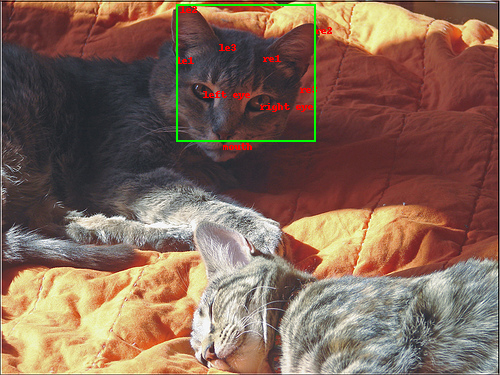

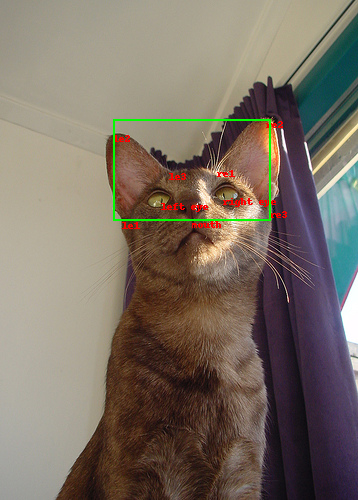

In [31]:
display(*images)